<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Series de tiempo</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego discutiendo con chatgpt.</small>
</p>

In [1]:
#pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
import warnings

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Define the ticker symbol for S&P 500
symbol = "^GSPC"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Display the first few rows of the data
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


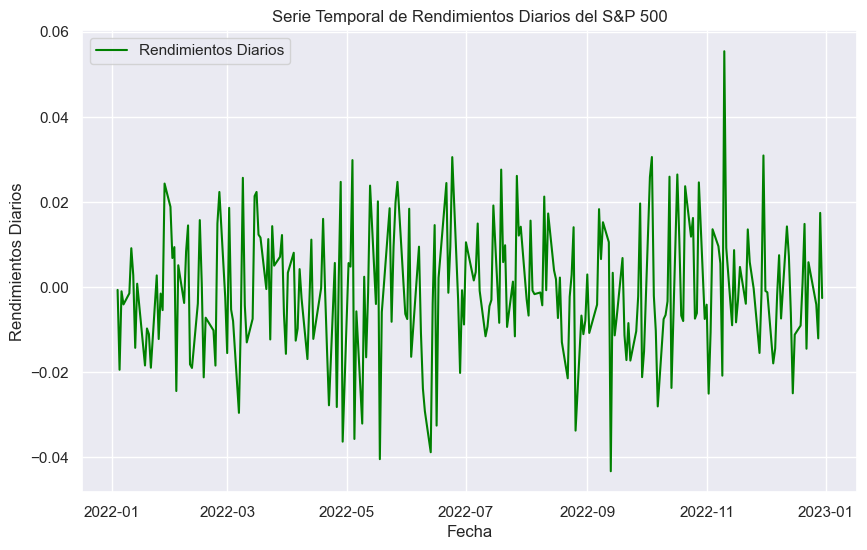

In [5]:
# Set the seaborn style to match the presentation aesthetic
sns.set(style="darkgrid")

# Plot the time series with green color
plt.figure(figsize=(10, 6))
plt.plot(data['Returns'], color='green', label='Rendimientos Diarios')
plt.title('Serie Temporal de Rendimientos Diarios del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos Diarios')
plt.legend()
plt.show()

In [6]:
import numpy as np

def simulate_archp(n_obs, p, alpha_array=None):
    # Fija la semilla para reproducibilidad
    np.random.seed(42)

    # Genera una cadena nu desde una distribución normal estándar
    nu = np.random.normal(0, 1, size=n_obs)

    # Inicializa el array de alphas si no se proporciona
    if alpha_array is None:
        alpha_array = np.random.rand(p + 1)

    # Inicializa el array de errores condicionales
    e = np.zeros_like(nu)
    e = np.concatenate((np.zeros(p), e))

    # Inicializa el array de varianzas condicionales
    h = np.zeros_like(nu)

    # Calcula el error inicial
    h[0] = alpha_array[0]
    e[0] = nu[0] * np.sqrt(h[0])

    # Calcula los errores y varianzas condicionales inciales
    for t in range(1, p):
        h[t] = alpha_array[0] + np.dot(alpha_array[1:t], e[t-1:t-1-p:-1]**2)
        e[t] = nu[t] * np.sqrt(h[t])

    # Calcula los errores y varianzas condicionales de forma recursiva
    for t in range(p, n_obs):
        print(f'{alpha_array[1:]=}')
        print(f'{e[t-1::-1]**2=}')
        print(f'{alpha_array[0]=}')
        
        h[t] = alpha_array[0] + np.dot(alpha_array[1:], e[t-1:t-1-p:-1]**2)
        e[t] = nu[t] * np.sqrt(h[t])

    return e, h

# Parámetro p para el modelo ARCH(p)
p_values = [1, 2, 3]  # Puedes ajustar los valores según tus necesidades

# Número de observaciones
n_observations = 100

# Simula procesos ARCH(p)
for p_order in p_values:
    errors, conditional_var = simulate_archp(n_obs=n_observations, p=p_order)
    print(f"Modelo ARCH({p_order}):")
    print("Errores condicionales:")
    print(errors)
    print("Varianza condicional:")
    print(conditional_var)
    print("\n")


alpha_array[1:]=array([0.22210781])
e[t-1::-1]**2=array([0.10298571])
alpha_array[0]=0.417411003148779


ValueError: shapes (1,) and (0,) not aligned: 1 (dim 0) != 0 (dim 0)

In [7]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

def simulate_garch(p, q, n_obs, mu=0.0, omega=1.0, alpha=None, beta=None, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Genera una serie temporal de ruido blanco
    epsilon = np.random.normal(size=n_obs)

    # Inicializa el modelo GARCH
    model = arch_model(epsilon, vol='Garch', p=p, q=q, mean='Constant')
    
    if alpha is not None:
        model.distribution.update({'alpha': alpha})
    if beta is not None:
        model.distribution.update({'beta': beta})

    # Ajusta el modelo
    result = model.fit(disp='off', show_warning=False)

    # Simula la serie temporal con el modelo GARCH ajustado
    simulated_data = result.simulate(start=0, nsimulations=n_obs, burn=500)
    simulated_returns = simulated_data.simulations.values[0, :, 0]

    # Agrega la media
    simulated_returns += mu

    return simulated_returns

# Parámetros del modelo GARCH(p, q)
p = 1
q = 1
n_obs = 1000

# Simula el modelo GARCH
simulated_returns = simulate_garch(p=p, q=q, n_obs=n_obs, seed=42)

# Visualiza la serie temporal simulada
plt.plot(simulated_returns)
plt.title(f'Simulación de un modelo GARCH({p}, {q})')
plt.xlabel('Tiempo')
plt.ylabel('Rendimientos')
plt.show()


AttributeError: 'ARCHModelResult' object has no attribute 'simulate'